## Упражнения по библиотеке Numpy

In [2]:
import numpy as np

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [9]:
arr = np.random.randint(1, 10, 10, dtype=np.int64)
print(arr)
arr[(arr >= 3) & (arr <= 8)] *= -1
print(arr)

[1 1 3 9 9 1 2 2 7 9]
[ 1  1 -3  9  9  1  2  2 -7  9]


**2.** Заменить максимальный элемент случайного массива на 0

**In case of one occurrence**

In [14]:
arr = np.random.randint(1, 10, 10, dtype=np.int64)
print(arr)
ind_max = np.argmax(arr)
print(ind_max)
arr[ind_max] = 0
print(arr)

[1 3 8 1 1 4 7 3 3 3]
2
[1 3 0 1 1 4 7 3 3 3]


**In case of multiple occurrence**

In [16]:
arr = np.random.randint(1, 10, 10, dtype=np.int64)
print(arr)
max_el = np.max(arr)
indices = np.argwhere(arr == max_el).flatten().tolist()
arr[indices] = 0
print(arr)


[3 2 4 5 9 1 8 5 9 7]
[3 2 4 5 0 1 8 5 0 7]


**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [43]:
arrays = np.random.randint(1, 10, size=(2, 2))
print(arrays)

def cartesian_product(arrays: np.ndarray) -> np.ndarray:
    result = arrays[0].reshape(-1, 1)

    for array in arrays[1:]:
        result = np.hstack([
            np.repeat(result, array.size, axis=0), 
            np.tile(array, result.size).reshape(-1, 1)
        ])
    
    return result

print(cartesian_product(arrays))

        

[[6 8]
 [9 6]]
[[6 9]
 [6 6]
 [8 9]
 [8 6]]


**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [103]:
from collections import defaultdict

a = np.random.randint(1,5,size=(8,3))
b = np.random.randint(1,5,size=(2,2))

print(a,b,sep='\n')

indices = (a[..., np.newaxis, np.newaxis] == a)

rows = (indices.sum(axis=(1,2,3)) >= b.shape[1]).nonzero()[0]

print(rows)

[[1 1 4]
 [4 2 4]
 [3 2 3]
 [3 2 1]
 [2 4 3]
 [1 4 4]
 [3 1 4]
 [3 3 3]]
[[2 2]
 [4 3]]
[0 1 2 3 4 5 6 7]


**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [19]:
a = np.random.randint(1,5,size=(10, 3))
print(a)
mask = (a[:, 0] != a[:, 1]) | (a[:, 0] != a[:, 2])
print(a[mask])

[[1 4 3]
 [1 2 1]
 [1 2 4]
 [4 4 3]
 [4 4 1]
 [1 1 3]
 [1 1 1]
 [2 4 1]
 [4 4 4]
 [4 1 2]]
[[1 4 3]
 [1 2 1]
 [1 2 4]
 [4 4 3]
 [4 4 1]
 [1 1 3]
 [2 4 1]
 [4 1 2]]


**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [46]:
a = np.random.randint(1, 3,size=(10, 3))
print(a)

a_unique = np.unique(a, axis=0)
    
print(a_unique)

[[1 1 1]
 [1 2 2]
 [1 1 2]
 [2 2 2]
 [2 1 2]
 [2 1 2]
 [2 1 2]
 [1 2 1]
 [1 2 2]
 [2 1 1]]
[[1 1 1]
 [1 1 2]
 [1 2 1]
 [1 2 2]
 [2 1 1]
 [2 1 2]
 [2 2 2]]


______
______

Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

___

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [6]:
a = np.random.randint(-3, 3, size=(4, 3))
print(a)
diag_el = a.diagonal()
diag_el = diag_el[diag_el != 0]
print(np.prod(diag_el))

import random
a = [[random.randint(-3, 3) for __ in range(3)] for _ in range(4)]
dim = min(len(a), len(a[0]))
res = 1
for i in range(dim):
   res *= a[i][i] if a[i][i] != 0 else 1
        
print(a)
print(res)

[[-2  1 -1]
 [ 0  2 -1]
 [ 2 -3 -2]
 [-2 -3 -3]]
8
[[3, 2, -2], [-2, -2, 3], [1, 3, 0], [3, 1, -1]]
-6


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [20]:
from collections import defaultdict

x = np.random.randint(0, 3, size=(5,))
y = np.random.randint(0, 3, size=(5,))

print(x)
print(y)

ans = np.array_equal(np.sort(x), np.sort(y))
print(ans)

x = [random.randint(0, 1) for _ in range(3)] 
y = [random.randint(0, 1) for _ in range(3)]
print(x)
print(y)

d = defaultdict(int)
for _ in x:
    d[_] += 1 
    
for _ in y:
    d[_] -= 1

print(d)
ans = sum(map(abs, d.values()))
print(True if ans == 0 else False)

[0 2 1 2 2]
[1 0 1 2 1]
False
[1, 0, 0]
[1, 0, 0]
defaultdict(<class 'int'>, {1: 0, 0: 0})
True


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [22]:
x = np.random.randint(0, 5, size=(10,))
print(x)

mask = x[:-1] == 0
raw = x[1:][mask]

if raw.size > 0:
    print(np.max(raw))
    
x = [random.randint(0, 5) for _ in range(10)]
print(x)
ans = x[0]
for i in range(len(x) - 1):
    el = x[i + 1]
    if x[i] == 0 and el != 0:
        ans = max(ans, el)

print(ans)

[4 4 1 4 4 4 2 3 0 4]
4
[3, 5, 1, 5, 4, 4, 5, 0, 0, 3]
3


* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [56]:
x = np.random.randint(0, 5, size=(5,), dtype=np.int64)
x = np.sort(x)
print(x)
ind = np.where(np.diff(x) != 0)[0]+1
ind = np.r_[0, ind, len(x)]
print(x[ind[:-1]], np.diff(ind))

from collections import defaultdict
x = [random.randint(0, 5) for _ in range(5)]
print(x)

d = defaultdict(int)
for el in x:
    d[el] += 1
print(tuple(d.keys()), tuple(d.values()))


[0 1 1 2 4]
[0 1 2 4] [1 2 1 1]
[3, 4, 0, 0, 5]
(3, 4, 0, 5) (1, 1, 2, 1)


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

In [70]:
import math


def own_cdist(x, y):
    return np.sqrt(np.sum((x[:, np.newaxis] - y)**2, axis=-1))

def pair_wise_cdist(x, y):
    result = list()
    
    for i in range(len(x)):
        row = list()
        for j in range(len(y)):
            summ = 0
            for k in range(len(x[0])):
                summ += (abs(x[i][k] - y[j][k]))**2
            row.append(math.sqrt(summ))
        result.append(row)
    return result

In [72]:
x = np.random.randint(0, 3, size=(3,3))
y = np.random.randint(0, 3, size=(3,3))

from scipy.spatial import distance

print(x)
print(y)

%timeit own_cdist(x, y)
%timeit distance.cdist(x, y, 'euclidean')
own_cdist(x, y)
print(pair_wise_cdist(x, y))
print(distance.cdist(x, y, 'euclidean'))


[[0 2 0]
 [2 1 2]
 [1 2 2]]
[[2 2 1]
 [0 0 1]
 [2 1 1]]
8.6 μs ± 568 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.42 μs ± 67.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[[2.23606797749979, 2.23606797749979, 2.449489742783178], [1.4142135623730951, 2.449489742783178, 1.0], [1.4142135623730951, 2.449489742783178, 1.7320508075688772]]
[[2.23606798 2.23606798 2.44948974]
 [1.41421356 2.44948974 1.        ]
 [1.41421356 2.44948974 1.73205081]]


_______
________

* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


In [73]:
import numpy as np

1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

In [3]:
calorie_stats = np.loadtxt("./data/cereal.csv", delimiter=",")
calorie_stats

array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [78]:
average_calories = np.average(calorie_stats - 60, axis=0)
print(average_calories)

46.883116883116884


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию

In [80]:
calorie_stats_sorted = np.sort(calorie_stats, axis=0)
print(calorie_stats_sorted)

[ 50.  50.  50.  70.  70.  80.  90.  90.  90.  90.  90.  90.  90. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 130.
 130. 140. 140. 140. 150. 150. 160.]


4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.

In [81]:
median_calories = np.median(calorie_stats, axis=0)
print(median_calories)

110.0


5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.

In [91]:
nth_percentile = 0
for per in range(0, 10, 1):
    nth_percentile = np.percentile(calorie_stats, per, axis=0)
    print("Percent: ", per, "Percentile: ", nth_percentile)
    if nth_percentile > 60:
        break

Percent:  0 Percentile:  50.0
Percent:  1 Percentile:  50.0
Percent:  2 Percentile:  50.0
Percent:  3 Percentile:  55.599999999999994
Percent:  4 Percentile:  70.0


6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [94]:
more_calories = calorie_stats_sorted[calorie_stats_sorted > 60].size/calorie_stats_sorted.size
print(more_calories*100)

96.1038961038961


7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [99]:
calorie_std = np.std(calorie_stats-100, axis=0)
print(calorie_std)

19.35718533390827


8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

In [167]:
Во-первых можно говорить, что больше 96% конкруентов проигрывают по кол-ву калорий. 
Во-вторых в среднем у конкруентов 100 +- 20 калорий

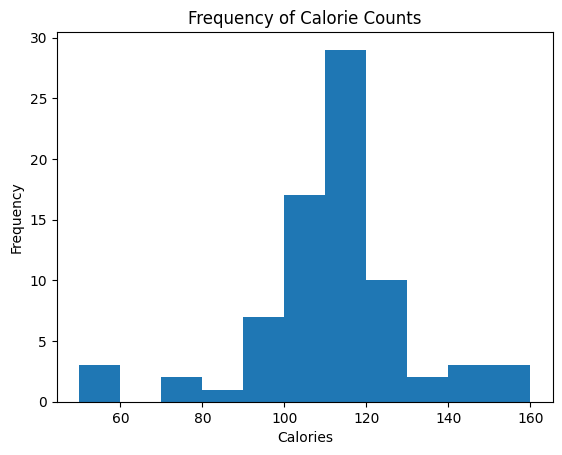

In [101]:
import matplotlib.pyplot as plt

plt.hist(calorie_stats, bins=np.unique(calorie_stats).size)

plt.title('Frequency of Calorie Counts')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.show()